In [73]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
import TridiagonalMatrixHandler as tmh
from numba import njit
import importlib
importlib.reload(tmh)

<module 'TridiagonalMatrixHandler' from '/Users/o.peretyatko/Study/university/Diplom/TridiagonalMatrixHandler.py'>

In [74]:
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{u}{C}) - σu;\qquad x∈(0,L); \qquad t∈(0,T) $$
# $$u(x,0)=e^{-i^2}; \qquad x∈(0,L); i∈(0,L)$$
# $$\frac{\partial u}{\partial x}|_{x=0,L} = 0;$$

$$F(u)=au^k_j\cdot(1-\frac{u^{k}_j}{C})- \sigma u^{k}_j$$
$$где\qquad C - некоторая\qquad константа$$

In [75]:
C=3

@njit
def carryingCapacityFunction(ukj, k=0, u2=0): return ukj/C

u = tmh.createAndSolveUByYavnayMethods(carryingCapacityFunction)
print("\nC = " + str(C))
print(u.max())


C = 3
2.7


	Коэффициент миграции (D) = 0.0	Рождения новых людей (a) = 1
			Смертность населения (σ) = 0.1

	Количество точек по ОХ (N) = 500	Количество точек по T (KT) = 1000
	Конец отрезка по OX (L) = 1000	Конечный момент (T) = 1000

		число Куранта = 0.0	Система устойчивая


<IPython.core.display.Javascript object>


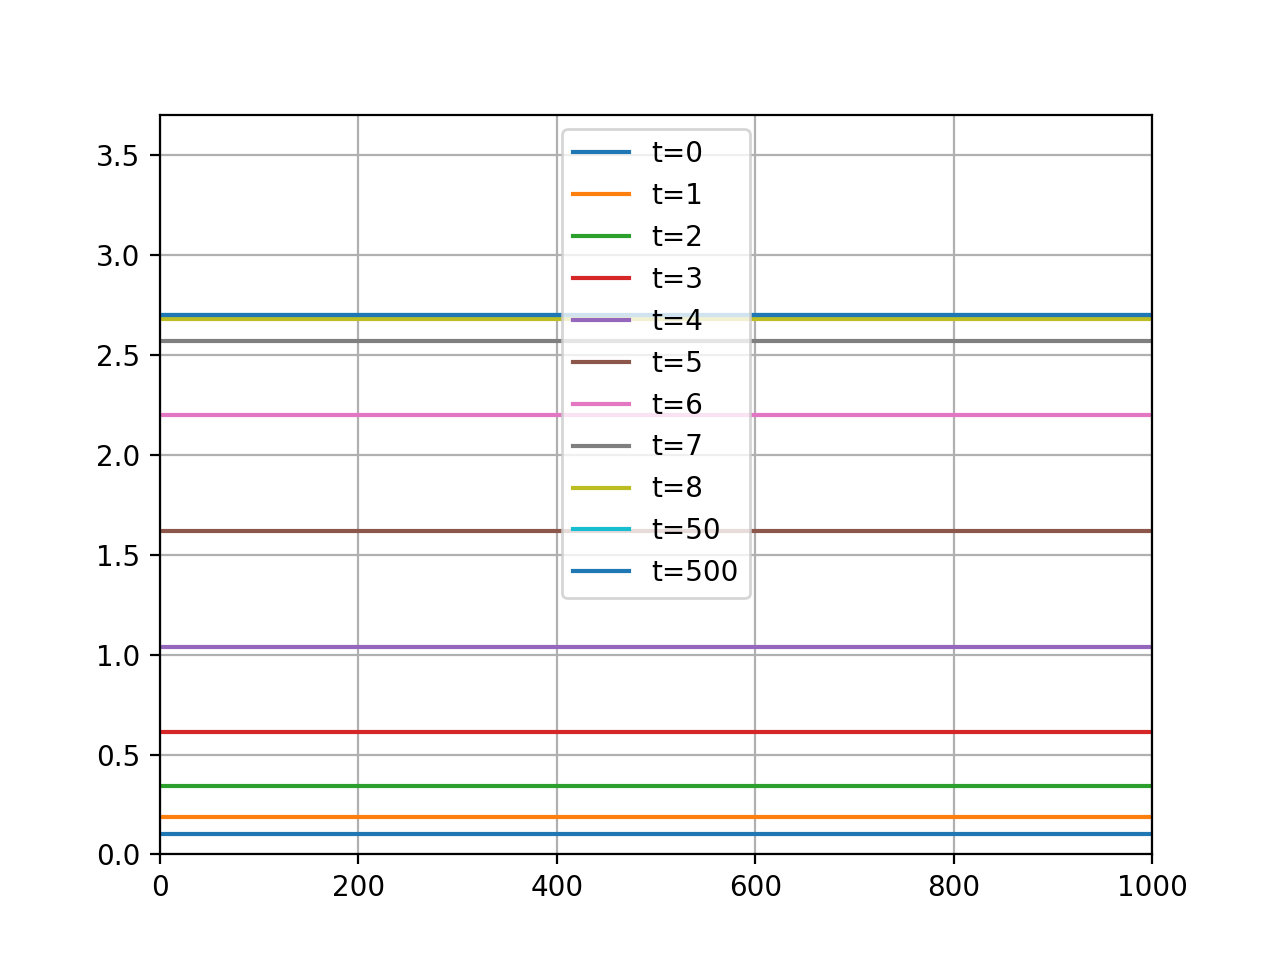

In [76]:
tmh.showAllConstant()

x=tmh.x

fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, tmh.L), ylim=(0, u.max()+1) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=10)
plt.grid(True)
plt.show()

In [19]:
diff = 0.00000001
value = 0
for i in range(1, tmh.NX - 1):
    if abs(u[int(tmh.NX/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1]) < diff and x[int(tmh.NX/3)] != x[i]:
        diff = abs(u[int(tmh.NX/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1])
        value = abs(x[int(tmh.NX/3)] - x[i])
print('Speed:', value/tmh.tau)


Speed: 330.33066132264526
